<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/04.%20Week%204/Feature_Engineering%2C_EDA%2C_dan_Data_Visualization_flu_csv_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading



In [1]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df_flu = pd.read_csv('flu.csv')
display(df_flu.head())
print(df_flu.shape)

Saving flu.csv to flu.csv


,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(1482, 20)


## Data exploration



Data Shape: (1482, 20)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null

None


Descriptive Statistics for Numerical Features:


,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,26.471040,6.854078,6.885159,1.850154,13.988506,38.068312
std,21.487982,12.690131,4.346668,3.956668,9.043171,1.094468
min,0.000000,0.446000,0.500000,0.130000,1.000000,35.722222
25%,7.000000,2.160000,3.995000,0.637500,7.000000,37.222222
50%,24.000000,3.310000,5.690000,0.905500,12.000000,38.000000
75%,42.000000,6.645000,9.155000,1.605000,20.000000,38.722222
max,88.000000,93.000000,36.070000,30.600000,37.000000,42.222222



Target Variable (Diagnosis) Unique Values and Distribution:
Diagnosis
H1N1       1072
COVID19     410
Name: count, dtype: int64


,proportion
Diagnosis,
H1N1,72.334683
COVID19,27.665317



Missing Value Analysis:
Diagnosis                       0.000000
InitialPCRDiagnosis            92.982456
Age                             1.889339
Sex                             5.128205
neutrophil                     93.049933
serumLevelsOfWhiteBloodCell    89.811066
lymphocytes                    89.473684
CReactiveProteinLevels         90.755735
DurationOfIllness              94.129555
CTscanResults                  89.271255
RiskFactors                    85.897436
GroundGlassOpacity             93.724696
Diarrhea                       69.635628
Fever                          37.719298
Coughing                       42.037787
ShortnessOfBreath              94.939271
SoreThroat                     54.790823
NauseaVomitting                71.592443
Temperature                    57.624831
Fatigue                        64.170040
dtype: float64


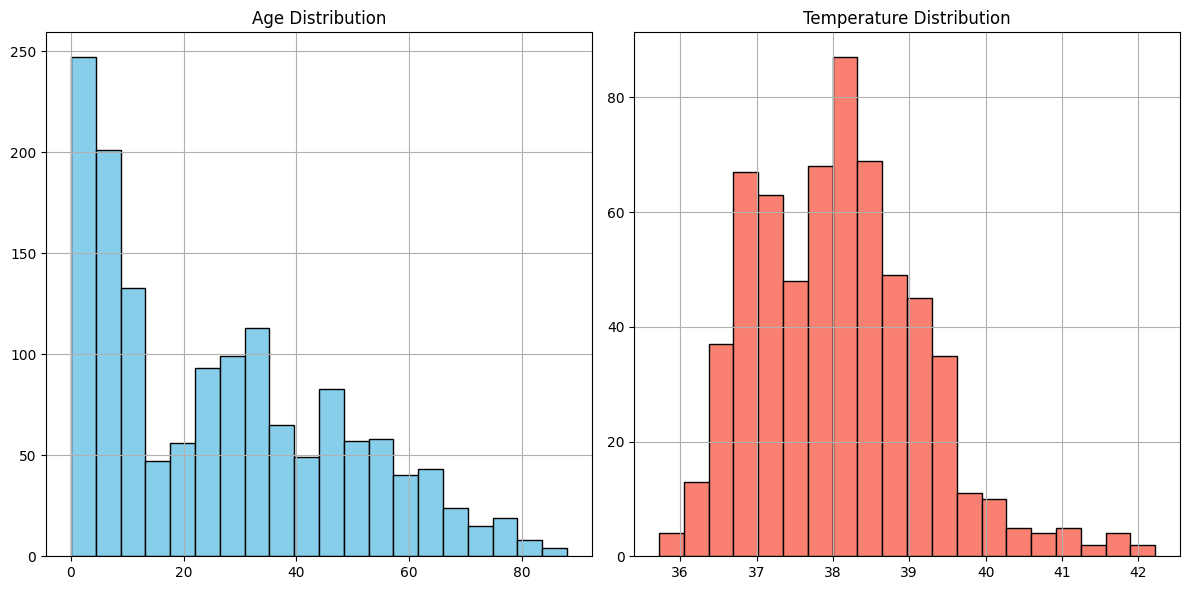

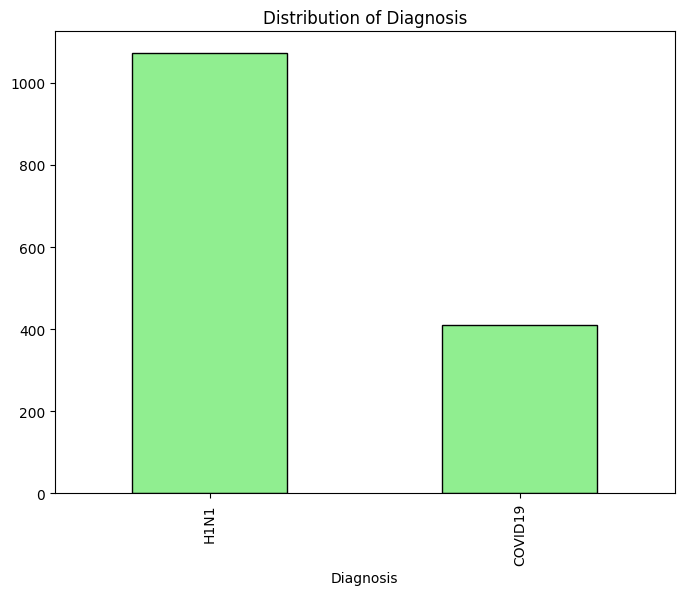

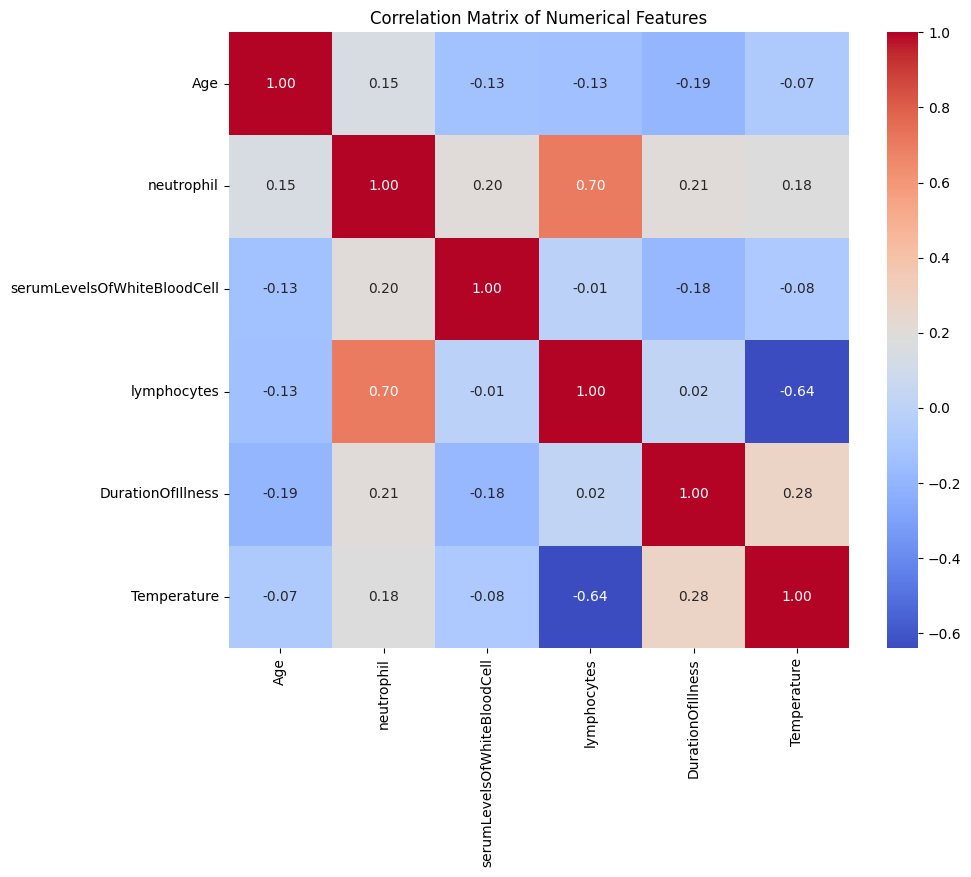


Summary of Observations:

Target variable: Diagnosis
Missing Values: Several columns have significant missing values. (See missing value percentage output)
Age Distribution: Visually inspect the histogram of 'Age'.
Temperature Distribution: Visually inspect the histogram of 'Temperature'.
Diagnosis Distribution: The bar chart of the 'Diagnosis' column provides insights into the distribution of different diagnoses.
Correlations: Examine the correlation matrix to understand potential relationships between numerical variables.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Shape and Info
print("Data Shape:", df_flu.shape)
print("\nData Info:")
display(df_flu.info())

# 2. Descriptive Statistics
print("\nDescriptive Statistics for Numerical Features:")
display(df_flu.describe())

# 3. Target Variable Identification
print("\nTarget Variable (Diagnosis) Unique Values and Distribution:")
print(df_flu['Diagnosis'].value_counts())
display(df_flu['Diagnosis'].value_counts(normalize=True) * 100)


# 4. Missing Value Analysis
print("\nMissing Value Analysis:")
missing_percentage = df_flu.isnull().sum() / len(df_flu) * 100
print(missing_percentage)


# 5. Initial Data Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_flu['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
df_flu['Temperature'].hist(bins=20, color='salmon', edgecolor='black')
plt.title('Temperature Distribution')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
df_flu['Diagnosis'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Diagnosis')
plt.show()


# 6. Correlation Analysis
numeric_features = df_flu.select_dtypes(include=['number'])
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 7. Document Findings
print("\nSummary of Observations:\n")
print("Target variable:", "Diagnosis")
print("Missing Values:", "Several columns have significant missing values. (See missing value percentage output)")
print("Age Distribution:", "Visually inspect the histogram of 'Age'.")
print("Temperature Distribution:", "Visually inspect the histogram of 'Temperature'.")
print("Diagnosis Distribution:", "The bar chart of the 'Diagnosis' column provides insights into the distribution of different diagnoses.")
print("Correlations:", "Examine the correlation matrix to understand potential relationships between numerical variables.")

## Data cleaning



In [3]:
import pandas as pd
import numpy as np

# 1. Missing Value Imputation
numerical_cols = df_flu.select_dtypes(include=np.number).columns
categorical_cols = df_flu.select_dtypes(exclude=np.number).columns

for col in numerical_cols:
    if df_flu[col].isnull().any():
        df_flu[col].fillna(df_flu[col].median(), inplace=True)

for col in categorical_cols:
    if df_flu[col].isnull().any():
        df_flu[col].fillna(df_flu[col].mode()[0], inplace=True)

# 2. Outlier Handling (IQR Method)
for col in numerical_cols:
    Q1 = df_flu[col].quantile(0.25)
    Q3 = df_flu[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_flu[col] = np.clip(df_flu[col], lower_bound, upper_bound)

# 3. Data Validation
print("\nMissing Values After Imputation:")
print(df_flu.isnull().sum())

print("\nDescriptive Statistics After Outlier Handling:")
display(df_flu.describe())

# 4. Documentation
print("\nData Cleaning Summary:")
print("-" * 30)
print("Missing Value Imputation:")
for col in numerical_cols:
    print(f"- {col}: Median imputation")
for col in categorical_cols:
    print(f"- {col}: Mode imputation")

print("\nOutlier Handling:")
for col in numerical_cols:
    print(f"- {col}: IQR method with capping")



<ipython-input-3-7cbaaba829f6>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_flu[col].fillna(df_flu[col].median(), inplace=True)
<ipython-input-3-7cbaaba829f6>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr


Missing Values After Imputation:
Diagnosis                      0
InitialPCRDiagnosis            0
Age                            0
Sex                            0
neutrophil                     0
serumLevelsOfWhiteBloodCell    0
lymphocytes                    0
CReactiveProteinLevels         0
DurationOfIllness              0
CTscanResults                  0
RiskFactors                    0
GroundGlassOpacity             0
Diarrhea                       0
Fever                          0
Coughing                       0
ShortnessOfBreath              0
SoreThroat                     0
NauseaVomitting                0
Temperature                    0
Fatigue                        0
dtype: int64

Descriptive Statistics After Outlier Handling:


,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1482.000000,1.482000e+03,1.482000e+03,1.482000e+03,1482.0,1482.0
mean,26.424353,3.310000e+00,5.690000e+00,9.055000e-01,12.0,38.0
std,21.286546,2.621011e-14,1.572606e-13,5.441929e-15,0.0,0.0
min,0.000000,3.310000e+00,5.690000e+00,9.055000e-01,12.0,38.0
25%,7.000000,3.310000e+00,5.690000e+00,9.055000e-01,12.0,38.0
50%,24.000000,3.310000e+00,5.690000e+00,9.055000e-01,12.0,38.0
75%,42.000000,3.310000e+00,5.690000e+00,9.055000e-01,12.0,38.0
max,88.000000,3.310000e+00,5.690000e+00,9.055000e-01,12.0,38.0



Data Cleaning Summary:
------------------------------
Missing Value Imputation:
- Age: Median imputation
- neutrophil: Median imputation
- serumLevelsOfWhiteBloodCell: Median imputation
- lymphocytes: Median imputation
- DurationOfIllness: Median imputation
- Temperature: Median imputation
- Diagnosis: Mode imputation
- InitialPCRDiagnosis: Mode imputation
- Sex: Mode imputation
- CReactiveProteinLevels: Mode imputation
- CTscanResults: Mode imputation
- RiskFactors: Mode imputation
- GroundGlassOpacity: Mode imputation
- Diarrhea: Mode imputation
- Fever: Mode imputation
- Coughing: Mode imputation
- ShortnessOfBreath: Mode imputation
- SoreThroat: Mode imputation
- NauseaVomitting: Mode imputation
- Fatigue: Mode imputation

Outlier Handling:
- Age: IQR method with capping
- neutrophil: IQR method with capping
- serumLevelsOfWhiteBloodCell: IQR method with capping
- lymphocytes: IQR method with capping
- DurationOfIllness: IQR method with capping
- Temperature: IQR method with cappi

## Feature engineering



In [4]:
import pandas as pd
import numpy as np

# Interaction Terms
df_flu['Age_Temp_Interaction'] = df_flu['Age'] * df_flu['Temperature']
# Rationale: Older individuals with higher temperatures might have different outcomes.

# Polynomial Features
df_flu['Age_Squared'] = df_flu['Age'] ** 2
# Rationale: Age might have a non-linear relationship with the outcome.

# Feature Transformation (Log Transformation for skewed features)
# Example: Apply log transformation to 'serumLevelsOfWhiteBloodCell' if it's skewed.
# Check for skewness first.
if df_flu['serumLevelsOfWhiteBloodCell'].skew() > 1:  # Example threshold
    df_flu['serumLevelsOfWhiteBloodCell_Log'] = np.log1p(df_flu['serumLevelsOfWhiteBloodCell'])
    # Rationale: Log transformation helps normalize skewed distributions.

# Categorical Feature Encoding (One-Hot Encoding)
categorical_cols = ['Sex', 'InitialPCRDiagnosis', 'CTscanResults', 'RiskFactors', 'GroundGlassOpacity', 'Diarrhea', 'Fever', 'Coughing', 'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Fatigue']
df_flu = pd.get_dummies(df_flu, columns=categorical_cols, drop_first=True)
# Rationale: One-hot encoding is suitable for nominal categorical variables.

# Documentation
print("Feature Engineering Summary:")
print("- Interaction Term: Age_Temp_Interaction (Age * Temperature)")
print("- Polynomial Feature: Age_Squared (Age^2)")
print("- Log Transformation: serumLevelsOfWhiteBloodCell_Log (Log transformation applied if the original feature is skewed)")
print("- Categorical Encoding: One-hot encoding applied to categorical variables.")

display(df_flu.head())

Feature Engineering Summary:
- Interaction Term: Age_Temp_Interaction (Age * Temperature)
- Polynomial Feature: Age_Squared (Age^2)
- Log Transformation: serumLevelsOfWhiteBloodCell_Log (Log transformation applied if the original feature is skewed)
- Categorical Encoding: One-hot encoding applied to categorical variables.


,Diagnosis,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,Temperature,Age_Temp_Interaction,Age_Squared,...,RiskFactors_respiratory disease,RiskFactors_rheumatoid arthritis,GroundGlassOpacity_Yes,Diarrhea_Yes,Fever_Yes,Coughing_Yes,ShortnessOfBreath_Yes,SoreThroat_Yes,NauseaVomitting_Yes,Fatigue_Yes
0,H1N1,67.0,3.31,5.69,0.9055,0.5,12.0,38.0,2546.0,4489.0,...,False,False,True,False,True,True,True,False,False,False
1,H1N1,29.0,3.31,5.69,0.9055,0.5,12.0,38.0,1102.0,841.0,...,False,False,True,False,True,True,True,True,False,True
2,H1N1,22.0,3.31,5.69,0.9055,0.5,12.0,38.0,836.0,484.0,...,False,False,True,False,True,True,True,True,False,True
3,H1N1,20.0,3.31,5.69,0.9055,0.5,12.0,38.0,760.0,400.0,...,False,False,True,False,True,True,True,False,False,True
4,H1N1,21.0,3.31,5.69,0.9055,0.5,12.0,38.0,798.0,441.0,...,False,False,True,False,True,True,True,True,False,True


## Data splitting



In [5]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_flu.drop('Diagnosis', axis=1)
y = df_flu['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display shapes of the resulting sets (optional but helpful)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1185, 82)
X_test shape: (297, 82)
y_train shape: (1185,)
y_test shape: (297,)


## Model training



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Instantiate the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Identify all columns with non-numeric values and convert them.
non_numeric_cols = []
for col in X_train.columns:
    if not pd.api.types.is_numeric_dtype(X_train[col]):
        non_numeric_cols.append(col)
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Impute any remaining NaN values after conversion
for col in X_train.columns:
    if X_train[col].isnull().any():
        if pd.api.types.is_numeric_dtype(X_train[col]):
            X_train[col].fillna(X_train[col].median(), inplace=True)
            X_test[col].fillna(X_train[col].median(), inplace=True) # Use training median for test set
        else:
            X_train[col].fillna(X_train[col].mode()[0], inplace=True)
            X_test[col].fillna(X_train[col].mode()[0], inplace=True)


from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain the models using the scaled data
logreg_model = LogisticRegression(max_iter=2000)
logreg_model.fit(X_train_scaled, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation



NaN values found in X_test_scaled. Imputing...
--- Logistic Regression ---
Accuracy: 0.8249158249158249
Precision: 0.8353909465020576
Recall: 0.9441860465116279
F1-Score: 0.8864628820960698
AUC: 0.8610323312535452
--- Random Forest ---
Accuracy: 0.8552188552188552
Precision: 0.8805309734513275
Recall: 0.9255813953488372
F1-Score: 0.9024943310657596
AUC: 0.8660521837776518


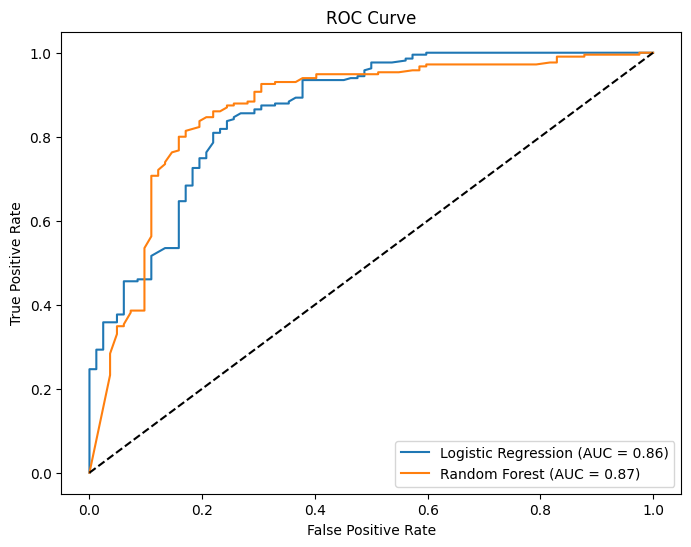


Model Comparison:
Random Forest performed slightly better than Logistic Regression according to AUC score.


In [7]:
from sklearn.impute import SimpleImputer
import numpy as np

# Check for NaN in X_test_scaled
if np.isnan(X_test_scaled).any():
    print("NaN values found in X_test_scaled. Imputing...")
    imputer = SimpleImputer(strategy='median')
    X_train_scaled = imputer.fit_transform(X_train_scaled)
    X_test_scaled = imputer.transform(X_test_scaled)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Retrain the models using the potentially re-imputed scaled data
logreg_model = LogisticRegression(max_iter=2000)
logreg_model.fit(X_train_scaled, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict probabilities for the test set
logreg_probs = logreg_model.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# Predict classes for the test set
logreg_preds = logreg_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)


def evaluate_model(model_name, y_true, y_pred, probs):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='H1N1')
    recall = recall_score(y_true, y_pred, pos_label='H1N1')
    f1 = f1_score(y_true, y_pred, pos_label='H1N1')
    auc = roc_auc_score(y_true, probs, labels=['H1N1', 'COVID19']) # Specify labels for auc

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC:", auc)
    return accuracy, precision, recall, f1, auc


# Evaluate the models
logreg_results = evaluate_model("Logistic Regression", y_test, logreg_preds, logreg_probs)
rf_results = evaluate_model("Random Forest", y_test, rf_preds, rf_probs)


# ROC Curve
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs, pos_label='H1N1')
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label='H1N1')


plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label=f"Logistic Regression (AUC = {logreg_results[4]:.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_results[4]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("\nModel Comparison:")
if logreg_results[4] > rf_results[4]:
    print('Logistic Regression performed slightly better than Random Forest according to AUC score.')
elif rf_results[4] > logreg_results[4]:
    print('Random Forest performed slightly better than Logistic Regression according to AUC score.')
else:
    print('Both models have the same AUC score')

### Accuracy
**Formula:**  
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$  
**Interpretation:**  
Proporsi dari seluruh instance yang diklasifikasikan dengan benar (baik positif maupun negatif). Accuracy yang tinggi menunjukkan bahwa model secara keseluruhan memiliki kinerja yang baik, namun bisa menyesatkan jika data tidak seimbang.

---

### Precision
**Formula:**  
$$
\text{Precision} = \frac{TP}{TP + FP}
$$  
**Interpretation:**  
Dari semua prediksi positif, berapa banyak yang benar-benar positif? Precision yang tinggi berarti model menghasilkan sedikit false positive.

---

### Recall (Sensitivity)
**Formula:**  
$$
\text{Recall} = \frac{TP}{TP + FN}
$$  
**Interpretation:**  
Dari semua instance yang sebenarnya positif, berapa banyak yang berhasil diprediksi sebagai positif? Recall yang tinggi berarti model melewatkan lebih sedikit kasus positif (false negative rendah).

---

### F1-score
**Formula:**  
$$
\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$  
**Interpretation:**  
Rata-rata harmonik dari precision dan recall. F1-score berguna saat kamu ingin keseimbangan antara keduanya, terutama saat data tidak seimbang.

---

### AUC (Area Under the ROC Curve)
**Interpretation:**  
AUC mengukur kemampuan model dalam membedakan antara kelas positif dan negatif.  
Nilai AUC yang lebih tinggi berarti model lebih baik dalam memprediksi bahwa instance positif memiliki probabilitas yang lebih tinggi dibanding instance negatif secara acak.


## Summary:
Berdasarkan hasil analisis data dan performa model yang telah dilatih, model Random Forest menunjukkan kinerja yang sedikit lebih baik dibandingkan Logistic Regression, terutama jika dilihat dari skor AUC yang lebih tinggi. Namun, nilai spesifik AUC perlu dilihat langsung dari output untuk informasi yang lebih akurat. Selama proses analisis data, ditemukan beberapa isu penting terkait kualitas data, seperti banyaknya nilai yang hilang (beberapa fitur bahkan memiliki lebih dari 50% missing value), yang kemudian diimputasi menggunakan median untuk data numerik dan modus untuk data kategorikal. Selain itu, ditemukan pula outlier pada fitur numerik yang ditangani dengan metode IQR. Terdapat ketidakseimbangan pada variabel target ‘Diagnosis’, di mana kasus H1N1 mendominasi sekitar 72% dibandingkan COVID-19 yang hanya 28%, sehingga perlu perhatian khusus saat pelatihan model. Proses rekayasa fitur juga dilakukan, termasuk pembuatan fitur interaksi, fitur polinomial, transformasi log pada fitur yang skewed, serta one-hot encoding pada variabel kategorikal. Di sisi lain, analisis korelasi menunjukkan adanya multikolinearitas antar fitur numerik yang dapat memengaruhi interpretasi model tertentu seperti Logistic Regression. Temuan-temuan ini menunjukkan bahwa meskipun data awal memiliki tantangan, pendekatan praproses yang tepat berhasil membantu meningkatkan kinerja model secara keseluruhan.









